# Correlations

In this notebook, we go through each parameter sequentially to check for correlations with other parameters. Note the use of the word _"seems"_ where correlations are not stark and where clear claims cannot be made.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_style('darkgrid'); sns.set_context('notebook')
import circular as crc

In [2]:
df = pd.read_csv("parameters.csv")

In [3]:
fig_file = "corr_figs/"

## Approach Angle vs. Other Parameters

### 1\. Change in Body Axis due to Azimuth

In [4]:
c = ['indigo','darkorange','seagreen'] #colours for the individuals

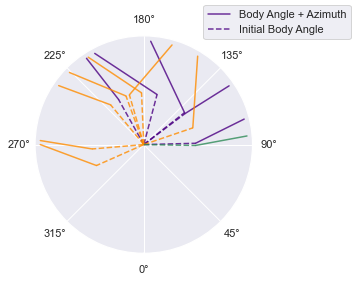

In [5]:
crc.body_axis_plotter(df['approach_ang'],df['approach_ang']+df['azimuth'],df['ind'],c,
                  'Initial Body Angle','Body Angle + Azimuth',fig_file+'body-axis-change-azi.png')

### 2\. Change in Body Axis due to Turn Angle

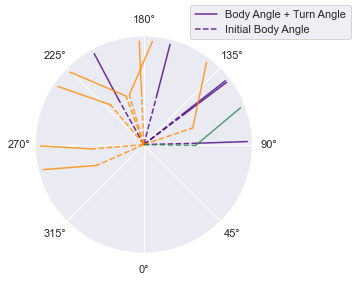

In [6]:
crc.body_axis_plotter(df['approach_ang'],df['approach_ang']+df['turn_ang'],df['ind'],c,
                  'Initial Body Angle','Body Angle + Turn Angle',fig_file+'body-axis-change-turn.png')

### 3\. Total Change in Body Axis

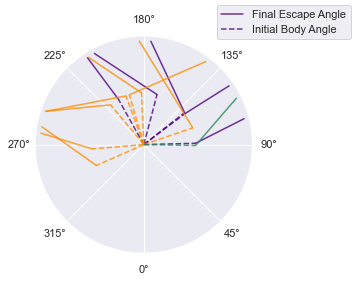

In [7]:
crc.body_axis_plotter(df['approach_ang'],df['approach_ang']+df['turn_ang']+df['azimuth'],df['ind'],c,
                  'Initial Body Angle','Final Escape Angle',fig_file+'body-axis-change-net.png')

### Comments:

**1\. Most of the change in body axis is due to the grasshopper jumping asymmetrically as opposed to turning prior to jumping.**

Just to confirm the hunch - majority of the points lie above the unity-line in a turn-angle vs. azimuth plot:

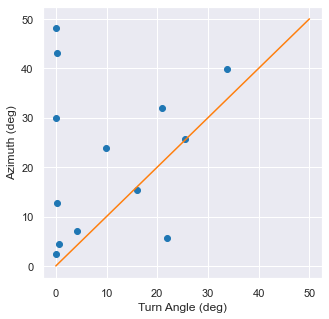

In [8]:
plt.figure(figsize = (5,5))
plt.plot(abs(df['turn_ang']), abs(df['azimuth']), 'o')
plt.plot([0,50],[0,50],'-')
plt.xlabel('Turn Angle (deg)'); plt.ylabel('Azimuth (deg)')
plt.savefig(fig_file+'turn-vs-azi.png', dpi = 300)
plt.show()

The high +ve correlation between turn angle and azimuth is visualised again in a later section.

**2\. It also seems as if the change in the grasshopper's body axis is larger when the predator approaches from behind compared to when the predator approaches from the side.**

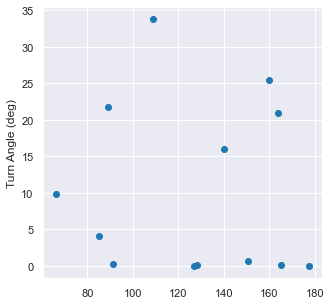

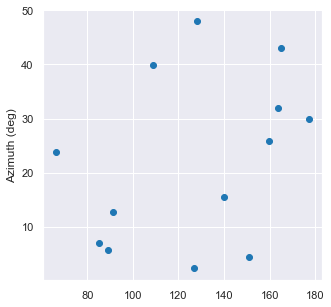

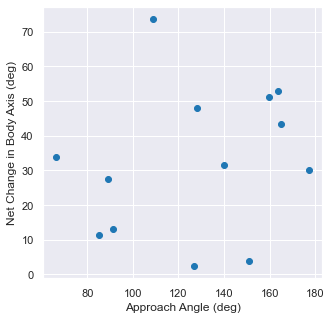

In [9]:
crc.corr_plot(abs(df['approach_ang']), abs(df['turn_ang']), 'Turn Angle (deg)','', fig_file+'turn-vs-app.png')
crc.corr_plot(abs(df['approach_ang']), abs(df['azimuth']), 'Azimuth (deg)','', fig_file+'azi-vs-app.png')
crc.corr_plot(abs(df['approach_ang']), abs(df['turn_ang']+df['azimuth']), 
          'Net Change in Body Axis (deg)','Approach Angle (deg)', fig_file+'esc_ang-vs-app.png')

No stark correlations.

**3\. But the direction of change seems unrelated to the direction of approach.** -ve for a change in axis angle implies rightward shift, +ve implies leftward shift. +ve sign for approach angle implies predator approach from right. -ve sign implies predator approach from the left. Expectation: points should lie on (+1,+1) and (-1,-1) if direction of turning is away from predator approach.

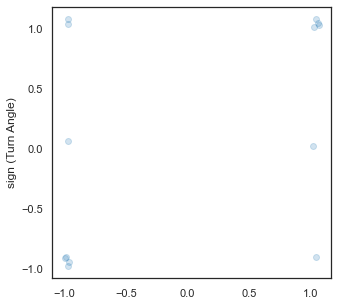

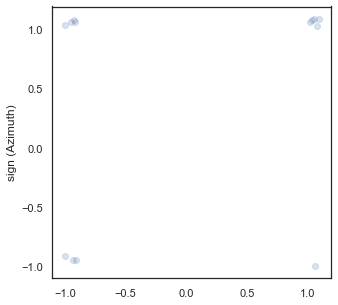

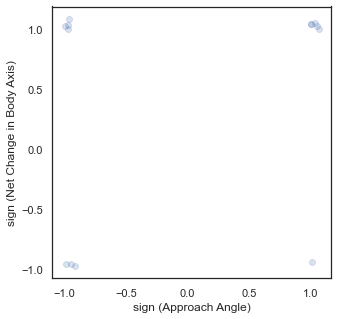

In [10]:
crc.sign_plotter(df['approach_ang'], df['turn_ang'], 'sign (Turn Angle)', '', fig_file+'sign_turn-vs-app.png')
crc.sign_plotter(df['approach_ang'], df['azimuth'], 'sign (Azimuth)', '', fig_file+'sign_azi-vs-app.png')
crc.sign_plotter(df['approach_ang'], df['azimuth']+df['turn_ang'], 
             'sign (Net Change in Body Axis)', 'sign (Approach Angle)', fig_file+'sign_esc_ang-vs-app.png')

**5\. Veolcity is independant of approach angle and seems to be a function of individual identity.** Likely because velocity not normalised by body size?

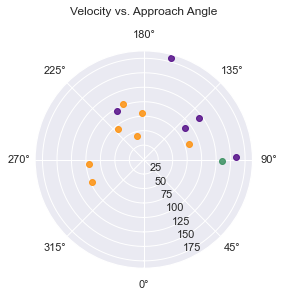

In [11]:
crc.round_plotter(df['approach_ang'],df['vel'],df['ind'],c,'Velocity vs. Approach Angle',fig_file+'velocity_vs_app.png')

**6\. Take-off-angle is independant of approach angle.**

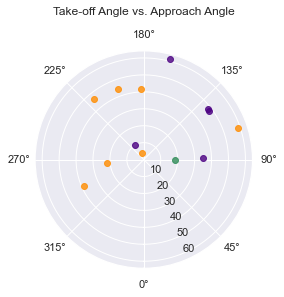

In [12]:
crc.round_plotter(df['approach_ang'],df['take_off_ang'],df['ind'],c,
              'Take-off Angle vs. Approach Angle',fig_file+'takeoff_vs_app.png')

## Turn Angle vs. Other Parameters

**1\. Turn Angle and Azimuth are correlated.**
To confirm, plot a spoke-plot between the two parameters.

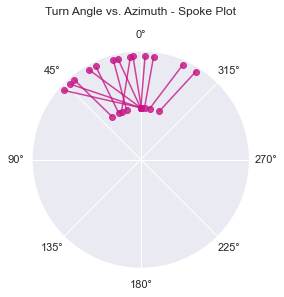

In [13]:
crc.spoke_plotter(df['turn_ang'],df['azimuth'],'Turn Angle vs. Azimuth - Spoke Plot',
              fig_file+'turn_vs_azi_spoke.png')

**2\. Larger take off angles seem to be associated with larger turn angles (primarily for individual 2 - the others don't show large turn angles).**

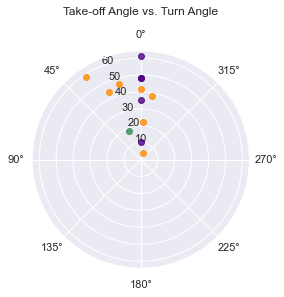

In [14]:
crc.round_plotter(df['turn_ang'],df['take_off_ang'],df['ind'],c,
              'Take-off Angle vs. Turn Angle',fig_file+'takeoff_vs_turn_pol.png',zero_direction = "N")

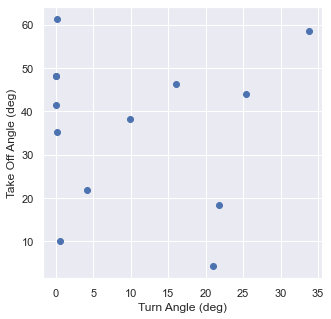

In [15]:
crc.corr_plot(abs(df['turn_ang']), df['take_off_ang'],
          'Take Off Angle (deg)', 'Turn Angle (deg)', fig_file+'takeoff_vs_turn.png')

Not a stark +ve correlation.

**3\. Velocity seems to be the opposite, in that lower turn angles are associated with larger velocity.**

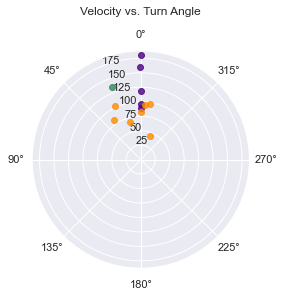

In [16]:
crc.round_plotter(df['turn_ang'],df['vel'],df['ind'],c,
              'Velocity vs. Turn Angle',fig_file+'vel_vs_turn_pol.png',zero_direction = "N")

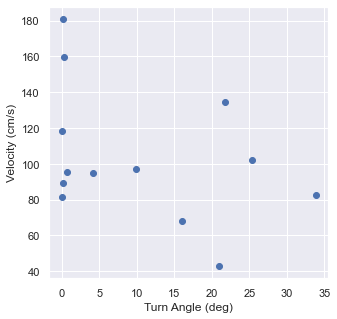

In [17]:
crc.corr_plot(abs(df['turn_ang']), df['vel'], 
          'Velocity (cm/s)', 'Turn Angle (deg)', fig_file+'vel_vs_turn.png')

Not a stark -ve correlation.

## Azimuth vs. Other Parameters

**1\. Larger take off angles are associated with larger azimuth!**

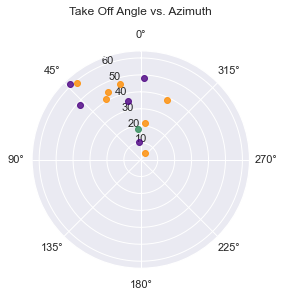

In [18]:
crc.round_plotter(df['azimuth'],df['take_off_ang'],df['ind'],c,
              'Take Off Angle vs. Azimuth',fig_file+'takoff_vs_azi_pol.png',zero_direction = "N")

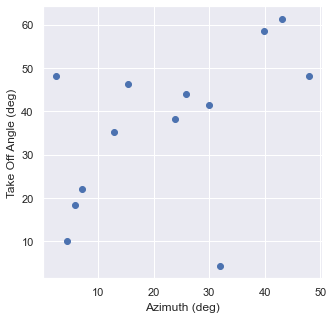

In [19]:
crc.corr_plot(abs(df['azimuth']), df['take_off_ang'], 
          'Take Off Angle (deg)', 'Azimuth (deg)', fig_file+'takeoff_vs_azi.png')

**2\. Velocity seems negatively correlated with azimuth.**

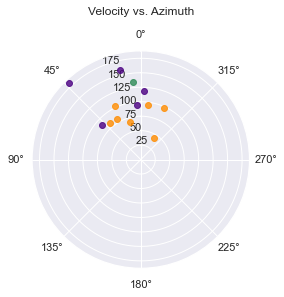

In [20]:
crc.round_plotter(df['azimuth'],df['vel'],df['ind'],c,
              'Velocity vs. Azimuth',fig_file+'vel_vs_azi_pol.png',zero_direction = "N")

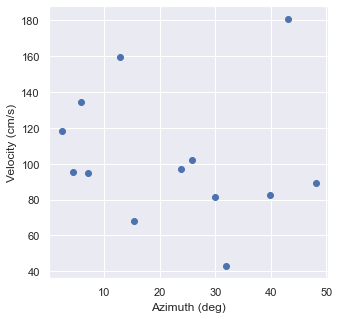

In [21]:
crc.corr_plot(abs(df['azimuth']), df['vel'], 
          'Velocity (cm/s)', 'Azimuth (deg)', fig_file+'vel_vs_azi.png')

## Take off Angle vs. Velocity

**1\. Obvious clustering prevents any reasonable claim.**

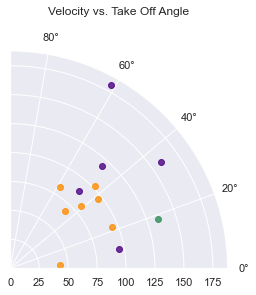

In [22]:
crc.round_plotter(df['take_off_ang'],df['vel'],df['ind'],c,
              'Velocity vs. Take Off Angle',fig_file+'vel_vs_takeoff_pol.png',max_ax_ang = 90,zero_direction = "E")

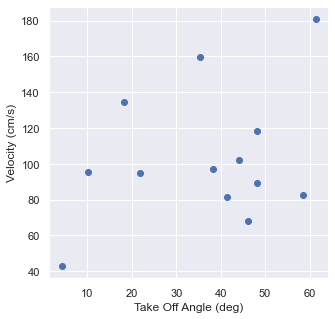

In [23]:
crc.corr_plot(df['take_off_ang'], df['vel'], 
          'Velocity (cm/s)', 'Take Off Angle (deg)', fig_file+'vel_vs_takeoff.png')